In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

In [2]:
from wordcloud import WordCloud 

In [3]:
import nltk.sentiment.vader

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tobis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
sid = SentimentIntensityAnalyzer()

In [7]:
pip install textblob

You should consider upgrading via the 'C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\python.exe -m pip install --upgrade pip' command.


In [8]:
df = pd.read_csv('SGE_english_final.csv')

In [9]:
df.head()

,Unnamed: 0,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords
0,0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m..."
1,1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡
2,2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W
3,3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️
4,4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎


In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'Tweet', 'User', 'Location', 'tweet', 'time',
       'weekday', 'Hour', 'Minute', 'translated_tweet',
       'tweet_without_stopwords'],
      dtype='object')

In [11]:
df = df[['Date', 'Tweet', 'User', 'Location',
       'tweet', 'time', 'weekday', 'Hour', 'Minute', 'translated_tweet','tweet_without_stopwords']]

In [12]:
len(df)

7362

In [13]:
df['time'] = pd.to_datetime(df['time'])#, format = '%y/%m/%d %H:%M:%S')

In [16]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m..."
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎


In [17]:
df['tweet_without_stopwords'] = df['tweet_without_stopwords'].astype(str)

In [18]:
df['scores'] = df['tweet_without_stopwords'].apply(lambda tweet_without_stopwords: sid.polarity_scores(tweet_without_stopwords))

In [19]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [20]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [21]:
df['com_score'] = df['compound'].apply(lambda score: 'pos' if score > 0 else ('neg' if score < 0 else 'neu'))

In [22]:
df.head(50)

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.2960,pos
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
5,2022-02-16,b'@SGE_Lukas @LeroySane10SZN @roberazziszn SGE...,b'ElyasJD9',b'069',SGE LUKAS lutscht bei bayern erfolgsfan für...,2022-02-16 20:45:53+00:00,2,20,45,SBU LUKAS sucks at bayern success fan for orig...,SBU LUKAS sucks bayern success fan original 15...,"{'neg': 0.158, 'neu': 0.316, 'pos': 0.525, 'co...",0.7003,pos
6,2022-02-16,"b'@SGE_Lukas okay das ist geil, seit wann aber?'",b'ichliebemantu',b'786',"okay das ist geil, seit wann aber?",2022-02-16 20:42:36+00:00,2,20,42,"okay that's cool, but since when?","okay that's cool, since when?","{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.4939,pos
7,2022-02-16,b'@LeroySane10SZN @roberazziszn @SGE_Lukas Ler...,b'ElyasJD9',b'069',LeroySaneBayernSZN geht auf meine Mutter,2022-02-16 20:42:25+00:00,2,20,42,LeroySaneBayernSZN goes to my mother,LeroySaneBayernSZN goes mother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
8,2022-02-16,b'@LeroySane10SZN @roberazziszn @SGE_Lukas ok ...,b'ElyasJD9',b'069',ok halt mal dein Maul jetzt dein club verli...,2022-02-16 20:41:23+00:00,2,20,41,ok shut your mouth now your club is losing,ok shut mouth club losing,"{'neg': 0.333, 'neu': 0.385, 'pos': 0.282, 'co...",-0.1027,neg
9,2022-02-16,b'@LeroySane10SZN @SGE_Lukas @ElyasJD9 Hab in ...,b'roberazziszn',b'',Hab in beiden gewohnt Bruder und ich kann’s...,2022-02-16 20:41:23+00:00,2,20,41,Lived in both brother and I can tell you,Lived brother I tell,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu


In [23]:
from textblob import TextBlob

In [24]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [25]:
df['Subjectivity'] = df['tweet_without_stopwords'].apply(getSubjectivity)

In [26]:
df['Polarity'] = df['tweet_without_stopwords'].apply(getPolarity)

In [27]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.296,pos,0.5,0.5
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.5,0.5
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,1.0,0.0
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0


In [28]:
# Plot WordCloud
allWords = ' '.join([twts for twts in df['tweet_without_stopwords']])
wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)

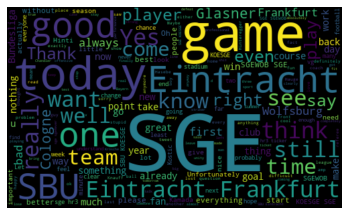

In [29]:
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [30]:
df['com_score'].value_counts()

neu    3059
pos    2837
neg    1466
Name: com_score, dtype: int64

In [31]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.296,pos,0.5,0.5
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.5,0.5
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,1.0,0.0
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0


In [32]:
df.describe()

,weekday,Hour,Minute,compound,Subjectivity,Polarity
count,7362.000000,7362.000000,7362.000000,7362.000000,7362.000000,7362.000000
mean,3.568052,14.824912,28.631079,0.094339,0.306356,0.061835
std,1.788900,5.032719,17.175339,0.358154,0.331049,0.291937
min,0.000000,0.000000,0.000000,-0.911800,0.000000,-1.000000
25%,2.000000,12.000000,14.000000,0.000000,0.000000,0.000000
50%,4.000000,16.000000,28.000000,0.000000,0.200000,0.000000
75%,5.000000,19.000000,43.000000,0.381800,0.550000,0.174306
max,6.000000,23.000000,59.000000,0.945900,1.000000,1.000000


In [33]:
pd.pivot_table(df, index = 'Date', values = 'compound')#, columns = 'col3')

,compound
Date,
2022-02-08,0.121877
2022-02-09,0.126353
2022-02-10,0.137337
2022-02-11,0.154792
2022-02-12,0.031172
2022-02-13,0.094545
2022-02-14,0.095617
2022-02-15,0.105001
2022-02-16,0.115604


In [84]:
df_totalTweets = pd.pivot_table(df, index = 'com_score', values = 'value', aggfunc='count')#, columns = 'col3')

In [85]:
df_totalTweets.to_csv('df_totalTweets_SGE.csv')

In [34]:
df['Hour'] = df['Hour'].astype(int)

In [35]:
import datetime as dt

In [36]:
df.tail(50)

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity
7312,2022-02-19,b'@chrjsi Bin beeindruckt.',b'alex_sge',"b'Frankfurt am Main, Hessen'",Bin beeindruckt.,2022-02-19 10:43:56+00:00,5,10,43,I'm impressed.,I'm impressed.,"{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'comp...",0.4767,pos,1.000000,1.000000
7313,2022-02-19,b'@StarDust240781 ich fasse es nicht - auch be...,b'danny_mst',b'NRW',"ich fasse es nicht - auch beim Thema ""Bundesl...",2022-02-19 10:33:12+00:00,5,10,33,"I can't believe it - even with the topic ""Bund...","I can't believe - even topic ""Bundesliga"" I ge...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000
7314,2022-02-19,b'+++Breaking News: Brandstiftung als #TikTokC...,b'SGE_Spiesser',b'',+++Breaking News: Brandstiftung als TikTokChal...,2022-02-19 10:32:16+00:00,5,10,32,+++Breaking News: Arson as a TikTokChallenge -...,+++Breaking News: Arson TikTokChallenge - Cath...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.100000,0.000000
7315,2022-02-19,b'SGE Journal: Thema-Turnier - Theorie \nTheor...,b'sgeJournal',"b'Emmenbr\xc3\xbccke, Switzerland'",SGE Journal: Thema-Turnier - Theorie \nTheorie...,2022-02-19 10:29:46+00:00,5,10,29,SGE Journal: Theme Tournament - Theory\nTheory...,SGE Journal: Theme Tournament - Theory Theory ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000
7316,2022-02-19,b'@Kev_SGE_1899 Bds holt noch',b'yml_r6',b'Deutschland',Bds holt noch,2022-02-19 10:29:35+00:00,5,10,29,Bds is still fetching,Bds still fetching,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000
7317,2022-02-19,b'@schokoladchen Da kann und wird es f\xc3\xbc...,b'SGE_Papa',b'Deutschland',Da kann und wird es für mich immer nur 1 gebe...,2022-02-19 10:28:27+00:00,5,10,28,There can and will always be only 1 for me. Ho...,There always 1 me. Hopefully home someday ❤️🏔,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,pos,0.000000,0.000000
7318,2022-02-19,b'@Miss_Teached Das ist heftig. \xf0\x9f\x96\x...,b'SGE_Papa',b'Deutschland',Das ist heftig. 🖤 Hoffe nicht schlimm bei dir...,2022-02-19 10:23:53+00:00,5,10,23,That's tough. 🖤 ​​Hope not bad for you. It fel...,That's tough. 🖤 ​​Hope bad you. It felt like s...,"{'neg': 0.281, 'neu': 0.393, 'pos': 0.326, 'co...",0.2023,pos,0.744444,-0.218519
7319,2022-02-19,b'@_parkcjay ouch sge \xf0\x9f\x98\x9e\xf0\x9f...,b'wafflevante',b'KIA ?! \n(?)TEEN ; m!nor \nshe / her ; multi...,ouch sge 😞💔,2022-02-19 10:22:54+00:00,5,10,22,also sge 😞💔,also sge 😞💔,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000
7320,2022-02-19,b'@CMoffiziell Mentalit\xc3\xa4t is immer da. ...,b'beeblebrox_SGE',b'',Mentalität is immer da. Egal ob Sport oder ni...,2022-02-19 10:20:11+00:00,5,10,20,mentality is always there. It doesn't matter i...,mentality always there. It matter sports not. ...,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",0.0258,pos,0.000000,0.000000
7321,2022-02-19,"b'In den Farben getrennt, in der Sache vereint...",b'CSchulle78',"b'Hofheim am Taunus, Deutschland'","In den Farben getrennt, in der Sache vereint.....",2022-02-19 10:20:01+00:00,5,10,20,"Separated by colours, united by the subject......","Separated colours, united subject... Thanks th...","{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp...",0.6908,pos,0.266667,0.016667


In [37]:
#df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)

In [38]:
df['datetime'] = df['Date'].astype(str) + ' '+ df['Hour'].astype(str)

In [39]:
df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')

<ipython-input-39-757bad35e65a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')


In [40]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H')

In [41]:
df['value'] = 1

In [42]:
df_datetime = pd.pivot_table(df, index = 'datetime', values = 'compound')#, columns = 'col3')

In [43]:
df_datetime.head(50)

,compound
datetime,
2022-02-08 16:00:00,0.049839
2022-02-08 17:00:00,0.101658
2022-02-08 18:00:00,0.115450
2022-02-08 19:00:00,-0.000338
2022-02-08 20:00:00,0.186470
2022-02-08 21:00:00,0.276905
2022-02-08 22:00:00,0.272583
2022-02-08 23:00:00,0.268675
2022-02-09 00:00:00,0.120550


In [69]:
df_day = pd.pivot_table(df, index = 'weekday', values = 'value', columns = 'com_score', aggfunc='count')

In [73]:
df_day.head(7)

com_score,weekday,neg,neu,pos
0,0,101,285,209
1,1,91,265,208
2,2,156,429,373
3,3,195,491,480
4,4,111,358,317
5,5,661,967,984
6,6,151,264,266


In [72]:
df_day.reset_index(inplace=True)

In [77]:
d = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [79]:
df_weekday = pd.DataFrame(d.items(), columns=['weekday', 'day'])

In [81]:
df_day = pd.merge(df_day,df_weekday, how='inner',on='weekday')

In [82]:
df_day.head(8)

,weekday,neg,neu,pos,day
0,0,101,285,209,Monday
1,1,91,265,208,Tuesday
2,2,156,429,373,Wednesday
3,3,195,491,480,Thursday
4,4,111,358,317,Friday
5,5,661,967,984,Saturday
6,6,151,264,266,Sunday


In [83]:
df_day.to_csv('df_day_SGE.csv')

In [86]:
df_hour = pd.pivot_table(df, index = 'Hour', values = 'value', columns = 'com_score', aggfunc='count')

In [87]:
df_hour.to_csv('df_hour_SGE.csv')

In [62]:
df.columns

Index(['Date', 'Tweet', 'User', 'Location', 'tweet', 'time', 'weekday', 'Hour',
       'Minute', 'translated_tweet', 'tweet_without_stopwords', 'scores',
       'compound', 'com_score', 'Subjectivity', 'Polarity', 'datetime',
       'value', 'Topic'],
      dtype='object')

In [44]:
df_sentiment = pd.pivot_table(df, index = 'datetime', values = 'value', columns = 'com_score', aggfunc='count')

In [45]:
df_sentiment.columns

Index(['neg', 'neu', 'pos'], dtype='object', name='com_score')

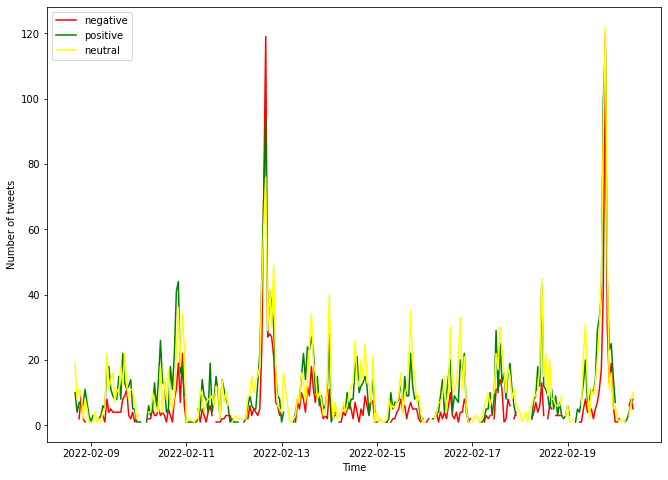

In [47]:
plt.figure(figsize=(11,8))
plt.xlabel("Time")
plt.ylabel('Number of tweets')
plt.gca().set_prop_cycle(color=['red', 'green', 'yellow'])
plt.plot(df_sentiment[['neg','pos','neu']])
plt.legend(['negative','positive','neutral'])

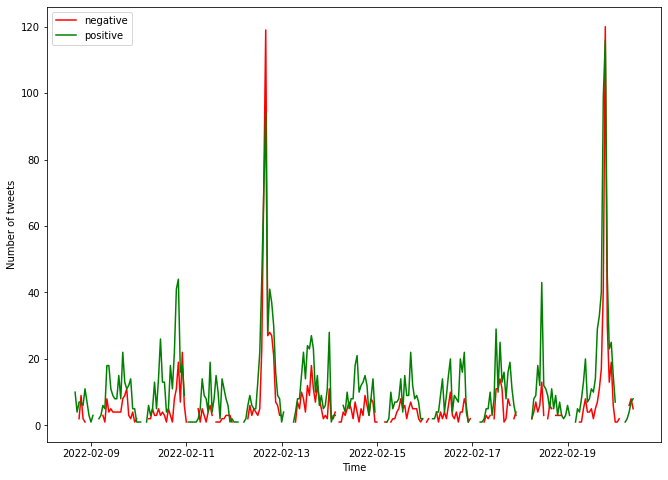

In [48]:
plt.figure(figsize=(11,8))
plt.xlabel("Time")
plt.ylabel('Number of tweets')
plt.gca().set_prop_cycle(color=['red', 'green'])
plt.plot(df_sentiment[['neg','pos']])
plt.legend(['negative','positive','neutral'])

In [68]:
df_sentiment.to_csv('df_sentiment_SGE.csv')

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [51]:
dtm = tfidf.fit_transform(df['tweet_without_stopwords'])

In [52]:
dtm

<7362x3415 sparse matrix of type '<class 'numpy.float64'>'
	with 32209 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.decomposition import NMF

In [65]:
nmf_model = NMF(n_components=5,random_state=42)

In [66]:
nmf_model.fit(dtm)

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=5, random_state=42)

In [67]:
for index,topic in enumerate(nmf_model.components_):
    print(f"The top 15 words for topic # {index}")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic # 0
['day', 'let', 'hasebe', 'hinti', 'team', 'fans', 'today', 'sge4ever', 'win', 'hr3', 'ticker', 'game', 'koesge', 'sgewob', 'sge']


The top 15 words for topic # 1
['today', 'hr3', 'saw', 'goal', 'bundesliga', 'team', 'time', 'hasebe', 'game', 'wolfsburg', 'cologne', 'koesge', 'frankfurt', 'eintracht', 'sbu']


The top 15 words for topic # 2
['case', 'exactly', 'bit', 'say', 'course', 'true', 'better', 'oh', 'look', 'unfortunately', 'today', 'way', 'thanks', 'right', 'yes']


The top 15 words for topic # 3
['cologne', 'sweet', 'hinti', 'unfortunately', 'block', 'perfect', 'tom', 'read', 'care', 'cool', 'great', 'lt', 'commitment', 'god', 'thank']


The top 15 words for topic # 4
['sgewob', 'actually', 'people', 'just', 'right', 'oh', 'bad', 'today', 'say', 'game', 'know', 'think', 'really', 'good', 'like']




In [57]:
topic_results = nmf_model.transform(dtm)

In [58]:
df['Topic'] = topic_results.argmax(axis=1)

In [59]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Polarity,datetime,value,Topic
0,2022-02-16,b'@oliver_sge @Martin87325975 @Claudia77383293...,b'SaschaLakic',b'',"Du Clown, dann erklär mal, ok. Bei dir hei...",2022-02-16 20:55:37+00:00,2,20,55,"You clown, then explain, ok. With you, explain...","You clown, explain, ok. With you, explaining m...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.296,pos,0.5,0.5,2022-02-16 20:00:00,1,9
1,2022-02-16,b'@SaschaLakic @Martin87325975 @Claudia7738329...,b'oliver_sge',b'',Sascha weiß mehr. 🤡,2022-02-16 20:54:46+00:00,2,20,54,Sasha knows more. 🤡,Sasha knows more. 🤡,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.5,0.5,2022-02-16 20:00:00,1,5
2,2022-02-16,b'@lukaasxn33 Endlich mal ein W',b'sge_paul',b'069',Endlich mal ein W,2022-02-16 20:52:29+00:00,2,20,52,Finally a W,Finally W,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,1.0,0.0,2022-02-16 20:00:00,1,5
3,2022-02-16,b'@Chris_76_SGE @BeateEi Es f\xc3\xbchlt sich ...,b'sge_bini',b'Rhein-Main-Gebiet',Es fühlt sich alles so gleichmäßig an 🤷🏼‍♀️,2022-02-16 20:50:01+00:00,2,20,50,It all feels so even 🤷🏼‍♀️,It feels even 🤷🏼‍♀️,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0,2022-02-16 20:00:00,1,4
4,2022-02-16,b'@BeateEi Ich werde berichten \xf0\x9f\x98\x8e',b'sge_bini',b'Rhein-Main-Gebiet',Ich werde berichten 😎,2022-02-16 20:49:27+00:00,2,20,49,I will report 😎,I report 😎,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,neu,0.0,0.0,2022-02-16 20:00:00,1,1


In [ ]:
# Anzahl an negativen und positiven Tweets gesamt
# Anzahl Tweets pro Tag und Stunde
